In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from ast import literal_eval

In [2]:
movies=pd.read_csv('movies_metadata.csv')
credits=pd.read_csv('credits.csv')
keywords=pd.read_csv('keywords.csv')
links=pd.read_csv('links_small.csv')
ratings=pd.read_csv('ratings_small.csv')

C:\Users\Manisha-Hitesh\anaconda3\envs\py3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
links


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9120,162672,3859980,402672.0
9121,163056,4262980,315011.0
9122,163949,2531318,391698.0
9123,164977,27660,137608.0


In [4]:
movies.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [5]:
movies.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [6]:
movies.drop(index=19730,inplace=True)
movies.drop(index=29503,inplace=True)
movies.drop(index=35587,inplace=True)

In [7]:
credits.isnull().sum()

cast    0
crew    0
id      0
dtype: int64

In [8]:
keywords.isnull().sum()

id          0
keywords    0
dtype: int64

In [9]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [10]:
links.isnull().sum()

movieId     0
imdbId      0
tmdbId     13
dtype: int64

In [11]:
links.dropna(inplace=True)

In [12]:
movies.id=movies.id.astype(str).astype(int)
movies=movies[movies.id.isin(links.tmdbId)]

In [13]:
movies.shape

(9099, 24)

In [14]:

movies=movies.merge(credits,on='id')

In [15]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [16]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [17]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [18]:
movies=movies.merge(keywords,on='id')

In [19]:
ratings=ratings.merge(links,on='movieId')

In [20]:
ratings.head()

,userId,movieId,rating,timestamp,imdbId,tmdbId
0,1,31,2.5,1260759144,112792,9909.0
1,7,31,3.0,851868750,112792,9909.0
2,31,31,4.0,1273541953,112792,9909.0
3,32,31,4.0,834828440,112792,9909.0
4,36,31,3.0,847057202,112792,9909.0


In [21]:
ratings.columns=['userId', 'movieId', 'rating', 'timestamp', 'imdbId', 'id']

In [22]:
ratings.head()

,userId,movieId,rating,timestamp,imdbId,id
0,1,31,2.5,1260759144,112792,9909.0
1,7,31,3.0,851868750,112792,9909.0
2,31,31,4.0,1273541953,112792,9909.0
3,32,31,4.0,834828440,112792,9909.0
4,36,31,3.0,847057202,112792,9909.0


In [23]:
rating = ratings.groupby('id',as_index=False) \
       .agg(ratings_avg=('rating','mean'),ratings_count=('rating','count')) \
       
       

In [24]:
rating.head()

,id,ratings_avg,ratings_count
0,2.0,4.500000,1
1,5.0,3.288462,26
2,6.0,3.250000,4
3,11.0,4.221649,291
4,12.0,3.803279,122


In [25]:
movies=movies.merge(rating,on='id')

In [26]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,tagline,title,video,vote_average,vote_count,cast,crew,keywords,ratings_avg,ratings_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",3.872470,247
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...",3.401869,107
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",3.161017,59
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...",2.384615,13
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",3.267857,56


In [27]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew', 'keywords', 'ratings_avg',
       'ratings_count'],
      dtype='object')

In [28]:
movies.drop(columns=['belongs_to_collection','budget','homepage','imdb_id','poster_path','production_companies','revenue',
                     'runtime','production_countries','original_title', 'status', 'tagline','vote_average', 'vote_count',
                    'video','spoken_languages'],axis=1,inplace=True)

In [29]:
movies.head()

,adult,genres,id,original_language,overview,popularity,release_date,title,cast,crew,keywords,ratings_avg,ratings_count
0,False,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,Toy Story,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",3.872470,247
1,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,Jumanji,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...",3.401869,107
2,False,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,Grumpier Old Men,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",3.161017,59
3,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,Waiting to Exhale,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...",2.384615,13
4,False,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,Father of the Bride Part II,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",3.267857,56


In [30]:
def get(col,n):
    if isinstance(col,list):
        x=[i['name'] for i in col]
        if len(x)>n:
            x=x[:n]
        return x

In [31]:
def director(col):
    for i in col:
        if ((i['job']=='Director') or (i['job']=='director')):
            return i['name']
    return np.nan

In [32]:
features=['genres','cast','keywords']
for i in features:
    movies[i]=movies[i].fillna('[]').apply(literal_eval).apply(get,args=(5,))

In [33]:
movies['crew']=movies['crew'].apply(literal_eval).apply(director)

In [34]:
movies=movies.rename(columns={'crew':'director'})

In [35]:
movies.head()

,adult,genres,id,original_language,overview,popularity,release_date,title,cast,director,keywords,ratings_avg,ratings_count
0,False,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,"[jealousy, toy, boy, friendship, friends]",3.872470,247
1,False,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston,"[board game, disappearance, based on children'...",3.401869,107
2,False,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",Howard Deutch,"[fishing, best friend, duringcreditsstinger, o...",3.161017,59
3,False,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,Waiting to Exhale,"[Whitney Houston, Angela Bassett, Loretta Devi...",Forest Whitaker,"[based on novel, interracial relationship, sin...",2.384615,13
4,False,[Comedy],11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,Father of the Bride Part II,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Charles Shyer,"[baby, midlife crisis, confidence, aging, daug...",3.267857,56


In [36]:
movies.drop_duplicates(subset='id',inplace=True)

In [37]:
movies.adult=movies.adult.apply(lambda x: 1 if x=='False' else 0)

In [38]:
movies.isnull().sum()

adult                 0
genres                0
id                    0
original_language     0
overview             12
popularity            0
release_date          0
title                 0
cast                  0
director             24
keywords              0
ratings_avg           0
ratings_count         0
dtype: int64

In [39]:
movies.dropna(subset=['title'],inplace=True)

In [40]:
a=[]
for i in movies['genres']:
    a.extend(i)
    


In [41]:
a=pd.DataFrame(a,columns=['genres'])

Text(0, 0.5, 'Genre of Movie')

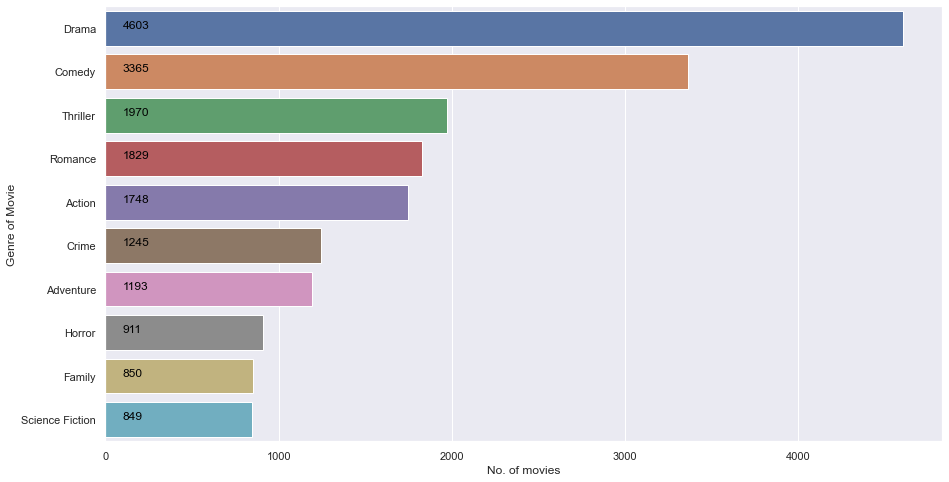

In [42]:
fig,ax=plt.subplots(figsize=(15,8))
ax=sns.countplot(y='genres',data=a,order=a.genres.value_counts().iloc[:10].index)
for i,j in enumerate(a.genres.value_counts().iloc[:10].values):
    ax.text(100,i,j,color='black',fontsize=12,horizontalalignment='left')
plt.xlabel('No. of movies')
plt.ylabel('Genre of Movie')

Text(0, 0.5, 'Language of Movie')

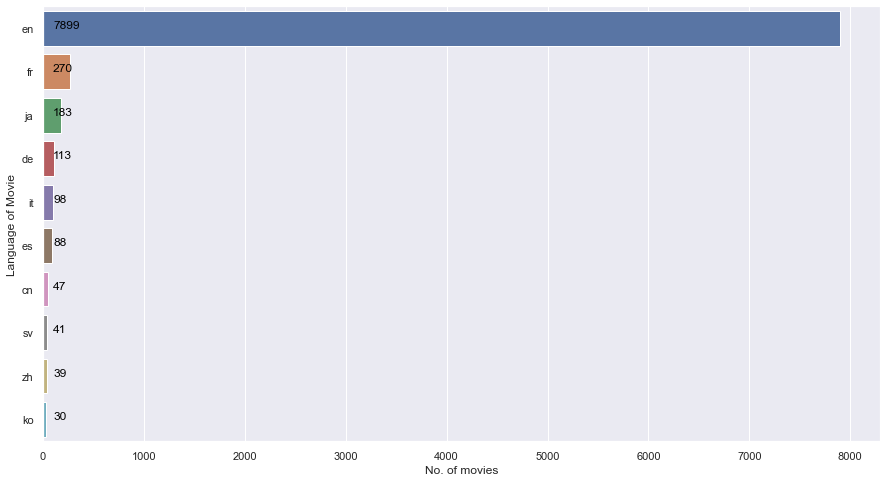

In [43]:
fig,ax=plt.subplots(figsize=(15,8))
ax=sns.countplot(y='original_language',data=movies,order=movies.original_language.value_counts().iloc[:10].index)
for i,j in enumerate(movies.original_language.value_counts().iloc[:10].values):
    ax.text(100,i,j,color='black',fontsize=12,horizontalalignment='left')
plt.xlabel('No. of movies')
plt.ylabel('Language of Movie')

In [44]:
movies.release_date=pd.to_datetime(movies.release_date)

In [45]:
movies.release_date=movies.release_date.dt.year

In [46]:
movies.release_date

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
9157    2016
9158    2001
9159    2016
9160    2016
9161    2016
Name: release_date, Length: 9025, dtype: int64

In [47]:
movies=movies.rename(columns={'release_date':'year'})

In [48]:
movies

,adult,genres,id,original_language,overview,popularity,year,title,cast,director,keywords,ratings_avg,ratings_count
0,1,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,"[jealousy, toy, boy, friendship, friends]",3.872470,247
1,1,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston,"[board game, disappearance, based on children'...",3.401869,107
2,1,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.7129,1995,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",Howard Deutch,"[fishing, best friend, duringcreditsstinger, o...",3.161017,59
3,1,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995,Waiting to Exhale,"[Whitney Houston, Angela Bassett, Loretta Devi...",Forest Whitaker,"[based on novel, interracial relationship, sin...",2.384615,13
4,1,[Comedy],11862,en,Just when George Banks has recovered from his ...,8.387519,1995,Father of the Bride Part II,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Charles Shyer,"[baby, midlife crisis, confidence, aging, daug...",3.267857,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9157,1,"[Comedy, Horror, Science Fiction]",390989,en,The new installment of the Sharknado franchise...,4.574494,2016,Sharknado 4: The 4th Awakens,"[Ian Ziering, Tara Reid, David Hasselhoff, Rya...",Anthony C. Ferrante,"[shark attack, sequel, farce, las vegas, creat...",1.500000,1
9158,1,[Drama],159550,en,A man must cope with the loss of his wife and ...,0.038998,2001,The Last Brickmaker in America,"[Sidney Poitier, Wendy Crewson, Jay O. Sanders...",Gregg Champion,"[friendship, brick making]",5.000000,1
9159,1,"[Thriller, Romance]",392572,hi,"Rustom Pavri, an honourable officer of the Ind...",7.333139,2016,Rustom,"[Akshay Kumar, Ileana D'Cruz, Esha Gupta, Arja...",Tinu Suresh Desai,[bollywood],5.000000,1
9160,1,"[Adventure, Drama, History, Romance]",402672,hi,"Village lad Sarman is drawn to big, bad Mohenj...",1.423358,2016,Mohenjo Daro,"[Hrithik Roshan, Pooja Hegde, Kabir Bedi, Arun...",Ashutosh Gowariker,[bollywood],3.000000,1


Text(0, 0.5, 'Actor')

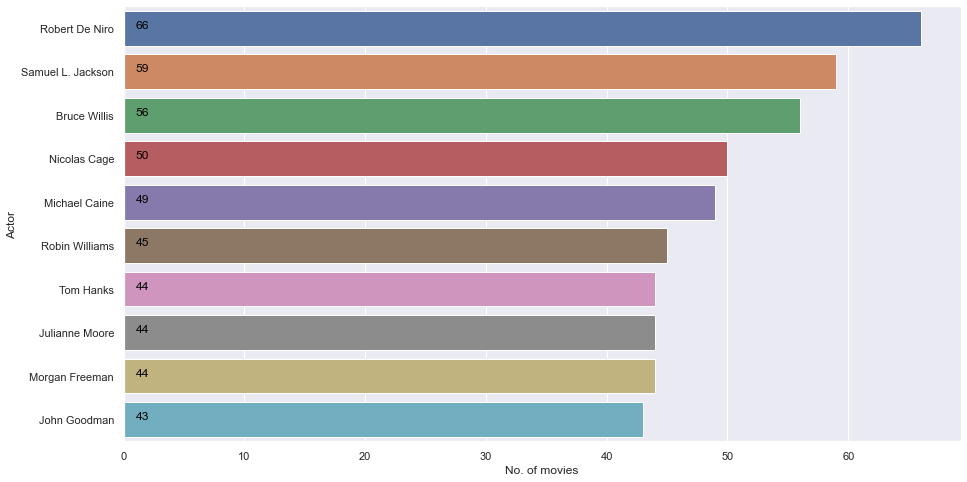

In [49]:
a=[]
for i in movies['cast']:
    a.extend(i)
a=pd.DataFrame(a,columns=['cast'])
fig,ax=plt.subplots(figsize=(15,8))
ax=sns.countplot(y='cast',data=a,order=a.cast.value_counts().iloc[:10].index)
for i,j in enumerate(a.cast.value_counts().iloc[:10].values):
    ax.text(1,i,j,color='black',fontsize=12,horizontalalignment='left')
plt.xlabel('No. of movies')
plt.ylabel('Actor')

Text(0, 0.5, 'Director')

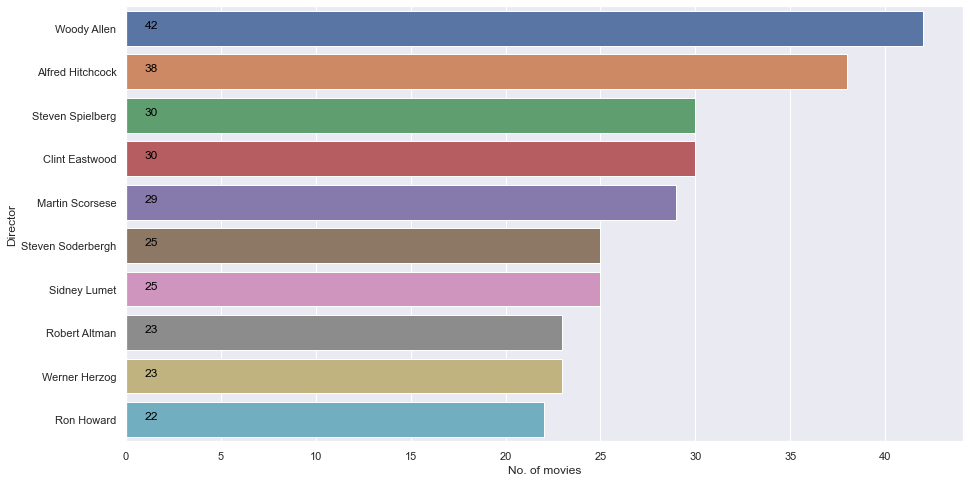

In [50]:
fig,ax=plt.subplots(figsize=(15,8))
ax=sns.countplot(y='director',data=movies,order=movies.director.value_counts().iloc[:10].index)
for i,j in enumerate(movies.director.value_counts().iloc[:10].values):
    ax.text(1,i,j,color='black',fontsize=12,horizontalalignment='left')
plt.xlabel('No. of movies')
plt.ylabel('Director')

In [51]:
len(movies)

9025

In [52]:
movies.describe()

,adult,id,year,ratings_avg,ratings_count
count,9025.0,9025.000000,9025.000000,9025.000000,9025.000000
mean,1.0,38089.665928,1991.983380,3.290203,11.059280
std,0.0,60965.477997,19.286473,0.881612,24.095433
min,1.0,2.000000,1902.000000,0.500000,1.000000
25%,1.0,9437.000000,1985.000000,2.833333,1.000000
50%,1.0,15658.000000,1997.000000,3.500000,3.000000
75%,1.0,38802.000000,2006.000000,3.961538,9.000000
max,1.0,416437.000000,2016.000000,5.000000,341.000000


In [53]:
temp=movies.copy()

In [54]:
temp.head()

,adult,genres,id,original_language,overview,popularity,year,title,cast,director,keywords,ratings_avg,ratings_count
0,1,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,"[jealousy, toy, boy, friendship, friends]",3.872470,247
1,1,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston,"[board game, disappearance, based on children'...",3.401869,107
2,1,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.7129,1995,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",Howard Deutch,"[fishing, best friend, duringcreditsstinger, o...",3.161017,59
3,1,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995,Waiting to Exhale,"[Whitney Houston, Angela Bassett, Loretta Devi...",Forest Whitaker,"[based on novel, interracial relationship, sin...",2.384615,13
4,1,[Comedy],11862,en,Just when George Banks has recovered from his ...,8.387519,1995,Father of the Bride Part II,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Charles Shyer,"[baby, midlife crisis, confidence, aging, daug...",3.267857,56


In [55]:
m=temp.ratings_count.quantile(0.8)

In [56]:
c=temp.ratings_avg.mean()

In [57]:
temp['weighted_rating']=(temp.ratings_count*temp.ratings_avg/(temp.ratings_count+m))+(m*c/(temp.ratings_count+m))

In [58]:
temp.reset_index(drop=True,inplace=True)
temp

,adult,genres,id,original_language,overview,popularity,year,title,cast,director,keywords,ratings_avg,ratings_count,weighted_rating
0,1,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,"[jealousy, toy, boy, friendship, friends]",3.872470,247,3.843356
1,1,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston,"[board game, disappearance, based on children'...",3.401869,107,3.389772
2,1,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.7129,1995,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",Howard Deutch,"[fishing, best friend, duringcreditsstinger, o...",3.161017,59,3.184342
3,1,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995,Waiting to Exhale,"[Whitney Houston, Angela Bassett, Loretta Devi...",Forest Whitaker,"[based on novel, interracial relationship, sin...",2.384615,13,2.837409
4,1,[Comedy],11862,en,Just when George Banks has recovered from his ...,8.387519,1995,Father of the Bride Part II,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Charles Shyer,"[baby, midlife crisis, confidence, aging, daug...",3.267857,56,3.272067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9020,1,"[Comedy, Horror, Science Fiction]",390989,en,The new installment of the Sharknado franchise...,4.574494,2016,Sharknado 4: The 4th Awakens,"[Ian Ziering, Tara Reid, David Hasselhoff, Rya...",Anthony C. Ferrante,"[shark attack, sequel, farce, las vegas, creat...",1.500000,1,3.162332
9021,1,[Drama],159550,en,A man must cope with the loss of his wife and ...,0.038998,2001,The Last Brickmaker in America,"[Sidney Poitier, Wendy Crewson, Jay O. Sanders...",Gregg Champion,"[friendship, brick making]",5.000000,1,3.412332
9022,1,"[Thriller, Romance]",392572,hi,"Rustom Pavri, an honourable officer of the Ind...",7.333139,2016,Rustom,"[Akshay Kumar, Ileana D'Cruz, Esha Gupta, Arja...",Tinu Suresh Desai,[bollywood],5.000000,1,3.412332
9023,1,"[Adventure, Drama, History, Romance]",402672,hi,"Village lad Sarman is drawn to big, bad Mohenj...",1.423358,2016,Mohenjo Daro,"[Hrithik Roshan, Pooja Hegde, Kabir Bedi, Arun...",Ashutosh Gowariker,[bollywood],3.000000,1,3.269474


In [59]:
temp.describe()

,adult,id,year,ratings_avg,ratings_count,weighted_rating
count,9025.0,9025.000000,9025.000000,9025.000000,9025.000000,9025.000000
mean,1.0,38089.665928,1991.983380,3.290203,11.059280,3.320063
std,0.0,60965.477997,19.286473,0.881612,24.095433,0.211712
min,1.0,2.000000,1902.000000,0.500000,1.000000,2.055395
25%,1.0,9437.000000,1985.000000,2.833333,1.000000,3.204540
50%,1.0,15658.000000,1997.000000,3.500000,3.000000,3.305189
75%,1.0,38802.000000,2006.000000,3.961538,9.000000,3.412332
max,1.0,416437.000000,2016.000000,5.000000,341.000000,4.439113


In [60]:
temp.sort_values(by='weighted_rating',ascending=False).head(20)

,adult,genres,id,original_language,overview,popularity,year,title,cast,director,keywords,ratings_avg,ratings_count,weighted_rating
284,1,"[Drama, Crime]",278,en,Framed in the 1940s for the double murder of h...,51.645403,1994,The Shawshank Redemption,"[Tim Robbins, Morgan Freeman, Bob Gunton, Clan...",Frank Darabont,"[prison, corruption, police brutality, prison ...",4.487138,311,4.439113
692,1,"[Drama, Crime]",238,en,"Spanning the years 1945 to 1955, a chronicle o...",41.109264,1972,The Godfather,"[Marlon Brando, Al Pacino, James Caan, Richard...",Francis Ford Coppola,"[italy, love at first sight, loss of father, p...",4.487500,200,4.414426
48,1,"[Drama, Crime, Thriller]",629,en,"Held in an L.A. interrogation room, Verbal Kin...",16.302466,1995,The Usual Suspects,"[Stephen Baldwin, Gabriel Byrne, Chazz Palmint...",Bryan Singer,"[law, relatives, theft, criminal, criminal mas...",4.370647,201,4.305012
973,1,"[Drama, Crime]",240,en,In the continuing saga of the Corleone crime f...,36.629307,1974,The Godfather: Part II,"[Al Pacino, Robert Duvall, Diane Keaton, Rober...",Francis Ford Coppola,"[italo-american, cuba, vororte, melancholy, pr...",4.385185,135,4.289004
472,1,"[Drama, History, War]",424,en,The true story of how businessman Oskar Schind...,41.725123,1993,Schindler's List,"[Liam Neeson, Ben Kingsley, Ralph Fiennes, Car...",Steven Spielberg,"[factory, concentration camp, hero, holocaust,...",4.303279,244,4.252034
266,1,"[Thriller, Crime]",680,en,"A burger-loving hit man, his philosophical par...",140.950236,1994,Pulp Fiction,"[John Travolta, Samuel L. Jackson, Uma Thurman...",Quentin Tarantino,"[transporter, brothel, drug dealer, boxer, mas...",4.256173,324,4.218910
535,1,"[Crime, Drama, Thriller]",275,en,"Jerry, a small-town Minnesota car salesman is ...",12.61469,1996,Fargo,"[William H. Macy, Frances McDormand, Steve Bus...",Joel Coen,"[cheating, ransom, salesclerk, winter, kidnapp...",4.256696,224,4.203682
731,1,"[Mystery, Crime, Thriller]",963,en,A private detective takes on a case that invol...,5.782544,1941,The Maltese Falcon,"[Humphrey Bogart, Mary Astor, Gladys George, P...",John Huston,"[san francisco, detective, loss of husband, mu...",4.387097,62,4.196969
722,1,"[Drama, Mystery, Thriller]",567,en,"Professional photographer L.B. ""Jeff"" Jeffries...",17.911314,1954,Rear Window,"[James Stewart, Grace Kelly, Wendell Corey, Th...",Alfred Hitchcock,"[nurse, photographer, suspicion of murder, gir...",4.315217,92,4.188311
783,1,"[Adventure, War, Romance]",488,en,"At the start of the first World War, in the mi...",6.636872,1951,The African Queen,"[Humphrey Bogart, Katharine Hepburn, Robert Mo...",John Huston,"[africa, missionary, river, desperation, boat]",4.420000,50,4.186867


mv=temp[temp.ratings_count>temp.ratings_count.quantile(0.9)]

rating_table=ratings.merge(mv[['title','id']],on ='id')

rating_table.shape

rating_table.isnull().sum()

chunk_size = 50000
chunks = [x for x in range(0, rating_table.shape[0], chunk_size)]

for i in range(0, len(chunks) -1):
    print(chunks[i], chunks[i + 1] - 1)

ratings_table= pd.concat([pd.pivot_table(data=rating_table.iloc[chunks[i]:chunks[i+1]-1],index='userId',\
                        columns='title', values='rating' )\
                          for i in range(0, len(chunks) - 1)])

In [61]:
s = temp.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_md = temp.drop('genres', axis=1).join(s)

<ipython-input-61-cf39ecfc08dc>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = temp.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)


In [62]:
gen_md

,adult,id,original_language,overview,popularity,year,title,cast,director,keywords,ratings_avg,ratings_count,weighted_rating,genre
0,1,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,"[jealousy, toy, boy, friendship, friends]",3.872470,247,3.843356,Animation
0,1,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,"[jealousy, toy, boy, friendship, friends]",3.872470,247,3.843356,Comedy
0,1,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,"[jealousy, toy, boy, friendship, friends]",3.872470,247,3.843356,Family
1,1,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston,"[board game, disappearance, based on children'...",3.401869,107,3.389772,Adventure
1,1,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston,"[board game, disappearance, based on children'...",3.401869,107,3.389772,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9023,1,402672,hi,"Village lad Sarman is drawn to big, bad Mohenj...",1.423358,2016,Mohenjo Daro,"[Hrithik Roshan, Pooja Hegde, Kabir Bedi, Arun...",Ashutosh Gowariker,[bollywood],3.000000,1,3.269474,Drama
9023,1,402672,hi,"Village lad Sarman is drawn to big, bad Mohenj...",1.423358,2016,Mohenjo Daro,"[Hrithik Roshan, Pooja Hegde, Kabir Bedi, Arun...",Ashutosh Gowariker,[bollywood],3.000000,1,3.269474,History
9023,1,402672,hi,"Village lad Sarman is drawn to big, bad Mohenj...",1.423358,2016,Mohenjo Daro,"[Hrithik Roshan, Pooja Hegde, Kabir Bedi, Arun...",Ashutosh Gowariker,[bollywood],3.000000,1,3.269474,Romance
9024,1,391698,en,"The band stormed Europe in 1963, and, in 1964,...",7.078301,2016,The Beatles: Eight Days a Week - The Touring Y...,"[Paul McCartney, Ringo Starr, John Lennon, Geo...",Ron Howard,"[music, documentary]",5.000000,1,3.412332,Documentary


In [63]:
def twenty_best(genres,language):
    if language=='all':
        return gen_md[gen_md.genre==genres].sort_values(by='weighted_rating',ascending=False).head(20).loc[
            :,['title','genre','original_language','weighted_rating']]
    else:
        return gen_md[(gen_md.genre==genres) & (gen_md.original_language==language)].sort_values(
            by='weighted_rating',ascending=False).head(20).loc[
            :,['title','genre','original_language','weighted_rating']]
    


In [64]:
twenty_best('Drama','all')

,title,genre,original_language,weighted_rating
284,The Shawshank Redemption,Drama,en,4.439113
692,The Godfather,Drama,en,4.414426
48,The Usual Suspects,Drama,en,4.305012
973,The Godfather: Part II,Drama,en,4.289004
472,Schindler's List,Drama,en,4.252034
535,Fargo,Drama,en,4.203682
722,Rear Window,Drama,en,4.188311
2283,American Beauty,Drama,en,4.183574
1002,Chinatown,Drama,en,4.182839
947,One Flew Over the Cuckoo's Nest,Drama,en,4.176896


In [65]:
twenty_best('Comedy','all')

,title,genre,original_language,weighted_rating
908,Monty Python and the Holy Grail,Comedy,en,4.147295
950,The Princess Bride,Comedy,en,4.140754
624,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy,en,4.108243
716,The Philadelphia Story,Comedy,en,4.075453
2759,Modern Times,Comedy,en,4.050503
717,Singin' in the Rain,Comedy,en,4.042502
620,A Close Shave,Comedy,en,4.036969
321,Forrest Gump,Comedy,en,4.026194
3847,Amélie,Comedy,fr,4.020092
723,It Happened One Night,Comedy,en,4.007175


In [66]:
reco1=temp.copy()

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [68]:
tf=TfidfVectorizer(analyzer='word',ngram_range=(1,2),min_df=0,stop_words='english')

In [69]:
reco1.overview.fillna('',inplace=True)

In [70]:
from sklearn.metrics.pairwise import linear_kernel

In [71]:
matrix=tf.fit_transform(reco1.overview)

In [72]:
cos_sim=linear_kernel(matrix,matrix)

In [73]:
cos_sim

array([[1.        , 0.00741803, 0.        , ..., 0.        , 0.        ,
        0.00498059],
       [0.00741803, 1.        , 0.01766029, ..., 0.        , 0.        ,
        0.00432221],
       [0.        , 0.01766029, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.00498059, 0.00432221, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [74]:
reco1.shape

(9025, 14)

In [75]:
def recomendation1(title1):
    idx=reco1[reco1.title==title1].index
    cos_score=list(enumerate(cos_sim[idx[0]]))
    cos_score.sort(reverse=True,key=lambda x: x[1])
    cos_score=cos_score[1:16]
    mov_idx=[x[0] for x in cos_score]
    return reco1.loc[mov_idx,['title','genres','weighted_rating']]

In [76]:
recomendation1('Back to the Future')

,title,genres,weighted_rating
1569,Back to the Future Part II,"[Adventure, Comedy, Family, Science Fiction]",3.457791
1570,Back to the Future Part III,"[Adventure, Comedy, Family, Science Fiction]",3.268903
3255,Two Ninas,"[Comedy, Romance]",3.412332
1504,Marty,"[Drama, Romance]",3.730906
2823,Passion of Mind,"[Drama, Romance]",3.251510
451,North,"[Comedy, Drama, Family, Fantasy, Science Fiction]",3.088632
8011,Madagascar 3: Europe's Most Wanted,"[Animation, Family]",3.084843
4592,Friends and Family,"[Action, Comedy]",3.412332
3860,Jimmy Neutron: Boy Genius,"[Action, Adventure, Animation, Comedy, Family]",3.298290
3506,Bully,"[Crime, Drama]",3.538632


In [77]:
recomendation1('The Prestige')

,title,genres,weighted_rating
2280,Nightmares,"[Science Fiction, Horror]",3.340903
5983,Wizards,"[Animation, Fantasy, Science Fiction]",3.351510
6479,The Covenant,"[Action, Adventure, Fantasy, Horror, Science F...",3.269474
7013,Magicians,[Comedy],3.269474
6223,Brokeback Mountain,"[Drama, Romance]",3.518396
7626,The Romantics,"[Comedy, Drama, Romance]",3.269474
6768,Saw IV,"[Horror, Thriller, Crime]",3.172244
2411,American Movie,[Documentary],3.750839
8695,Blackhat,"[Crime, Drama, Mystery]",3.084843
92,City Hall,"[Drama, Thriller]",3.375666


In [78]:
reco2=temp.copy()

In [79]:
reco2.head()

,adult,genres,id,original_language,overview,popularity,year,title,cast,director,keywords,ratings_avg,ratings_count,weighted_rating
0,1,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,"[jealousy, toy, boy, friendship, friends]",3.872470,247,3.843356
1,1,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston,"[board game, disappearance, based on children'...",3.401869,107,3.389772
2,1,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.7129,1995,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",Howard Deutch,"[fishing, best friend, duringcreditsstinger, o...",3.161017,59,3.184342
3,1,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995,Waiting to Exhale,"[Whitney Houston, Angela Bassett, Loretta Devi...",Forest Whitaker,"[based on novel, interracial relationship, sin...",2.384615,13,2.837409
4,1,[Comedy],11862,en,Just when George Banks has recovered from his ...,8.387519,1995,Father of the Bride Part II,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Charles Shyer,"[baby, midlife crisis, confidence, aging, daug...",3.267857,56,3.272067


In [80]:
def cleanup(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [81]:
features = ['cast', 'keywords', 'director', 'genres', 'original_language']
reco2.director=reco2.director.astype('str').apply(lambda x: [x,x])
for feature in features:
    reco2[feature] = reco2[feature].apply(cleanup)

In [82]:
reco2[['genres','cast']].head(3)

,genres,cast
0,"[animation, comedy, family]","[tomhanks, timallen, donrickles, jimvarney, wa..."
1,"[adventure, fantasy, family]","[robinwilliams, jonathanhyde, kirstendunst, br..."
2,"[romance, comedy]","[waltermatthau, jacklemmon, ann-margret, sophi..."


In [83]:
from nltk.stem import SnowballStemmer

In [84]:
sn=SnowballStemmer('english')

In [85]:
reco2.keywords=reco2.keywords.apply(lambda x: [sn.stem(i) for i in x])

In [86]:
reco2['description']=reco2.genres+reco2.cast+reco2.director+reco2.keywords

In [87]:
reco2.description=reco2.description.apply(lambda x: ' '.join(x))

In [88]:
reco2

,adult,genres,id,original_language,overview,popularity,year,title,cast,director,keywords,ratings_avg,ratings_count,weighted_rating,description
0,1,"[animation, comedy, family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995,Toy Story,"[tomhanks, timallen, donrickles, jimvarney, wa...","[johnlasseter, johnlasseter]","[jealousi, toy, boy, friendship, friend]",3.872470,247,3.843356,animation comedy family tomhanks timallen donr...
1,1,"[adventure, fantasy, family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995,Jumanji,"[robinwilliams, jonathanhyde, kirstendunst, br...","[joejohnston, joejohnston]","[boardgam, disappear, basedonchildren'sbook, n...",3.401869,107,3.389772,adventure fantasy family robinwilliams jonatha...
2,1,"[romance, comedy]",15602,en,A family wedding reignites the ancient feud be...,11.7129,1995,Grumpier Old Men,"[waltermatthau, jacklemmon, ann-margret, sophi...","[howarddeutch, howarddeutch]","[fish, bestfriend, duringcreditssting, oldmen]",3.161017,59,3.184342,romance comedy waltermatthau jacklemmon ann-ma...
3,1,"[comedy, drama, romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995,Waiting to Exhale,"[whitneyhouston, angelabassett, lorettadevine,...","[forestwhitaker, forestwhitaker]","[basedonnovel, interracialrelationship, single...",2.384615,13,2.837409,comedy drama romance whitneyhouston angelabass...
4,1,[comedy],11862,en,Just when George Banks has recovered from his ...,8.387519,1995,Father of the Bride Part II,"[stevemartin, dianekeaton, martinshort, kimber...","[charlesshyer, charlesshyer]","[babi, midlifecrisi, confid, age, daughter]",3.267857,56,3.272067,comedy stevemartin dianekeaton martinshort kim...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9020,1,"[comedy, horror, sciencefiction]",390989,en,The new installment of the Sharknado franchise...,4.574494,2016,Sharknado 4: The 4th Awakens,"[ianziering, tarareid, davidhasselhoff, ryanne...","[anthonyc.ferrante, anthonyc.ferrante]","[sharkattack, sequel, farc, lasvega, creaturef...",1.500000,1,3.162332,comedy horror sciencefiction ianziering tarare...
9021,1,[drama],159550,en,A man must cope with the loss of his wife and ...,0.038998,2001,The Last Brickmaker in America,"[sidneypoitier, wendycrewson, jayo.sanders, ma...","[greggchampion, greggchampion]","[friendship, brickmak]",5.000000,1,3.412332,drama sidneypoitier wendycrewson jayo.sanders ...
9022,1,"[thriller, romance]",392572,hi,"Rustom Pavri, an honourable officer of the Ind...",7.333139,2016,Rustom,"[akshaykumar, ileanad'cruz, eshagupta, arjanba...","[tinusureshdesai, tinusureshdesai]",[bollywood],5.000000,1,3.412332,thriller romance akshaykumar ileanad'cruz esha...
9023,1,"[adventure, drama, history, romance]",402672,hi,"Village lad Sarman is drawn to big, bad Mohenj...",1.423358,2016,Mohenjo Daro,"[hrithikroshan, poojahegde, kabirbedi, arunoda...","[ashutoshgowariker, ashutoshgowariker]",[bollywood],3.000000,1,3.269474,adventure drama history romance hrithikroshan ...


In [89]:
count = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
matrix1 = count.fit_transform(reco2.description)

In [90]:
cos_sim1=linear_kernel(matrix1,matrix1)

In [91]:
def recomendation2(title1):
    idx=reco2[reco2.title==title1].index
    cos_score=list(enumerate(cos_sim1[idx[0]]))
    cos_score.sort(reverse=True,key=lambda x: x[1])
    cos_score=cos_score[1:16]
    mov_idx=[x[0] for x in cos_score]
    return reco2.loc[mov_idx,['title','original_language','genres','weighted_rating']]

In [93]:
recomendation2('The Godfather')

,title,original_language,genres,weighted_rating
973,The Godfather: Part II,en,"[drama, crime]",4.289004
1581,The Godfather: Part III,en,"[crime, drama, thriller]",3.370263
960,Apocalypse Now,en,"[drama, war]",4.050181
1325,The Rainmaker,en,"[drama, crime, thriller]",3.491880
3670,The Cotton Club,en,"[music, drama, crime, romance]",3.151510
1670,The Outsiders,en,"[crime, drama]",3.521462
2977,The Conversation,en,"[crime, drama, mystery]",3.938129
3279,Gardens of Stone,en,"[drama, history]",3.392040
5781,Rumble Fish,en,"[action, adventure, crime, drama, romance]",3.090903
635,Jack,en,"[comedy, drama, sciencefiction]",3.008795
